# MRI Modalities and Their Purposes

#### FLAIR (Fluid-Attenuated Inversion Recovery)
**Purpose**: Shows abnormal tissue like lesions by making the fluid in the brain (like cerebrospinal fluid) appear dark.  
**Example Use**: Detecting multiple sclerosis lesions.

#### T1-Weighted (T1w)
**Purpose**: Provides a clear picture of brain anatomy, showing different tissues in the brain.  
**Example Use**: General brain structure examination.

#### T1-Weighted with Contrast (T1c)
**Purpose**: Highlights areas where there is abnormal growth or inflammation by using a contrast agent that makes these areas appear bright.  
**Example Use**: Detecting tumors.

#### T1-Weighted without Contrast (T1n)
**Purpose**: Similar to T1w but without using a contrast agent.  
**Example Use**: General brain structure examination without contrast.

#### T2-Weighted (T2w)
**Purpose**: Shows areas with more fluid (like swelling) by making the fluid appear bright.  
**Example Use**: Detecting fluid-filled structures and edema.

# Mask and Segmentation

#### Mask
**Purpose**: A black and white or color-coded image that marks specific areas of interest, like where a tumor is located.  
**Example Use**: Highlighting areas that are diseased or need special attention.

#### Segmentation (Seg)
**Purpose**: The process of dividing the MRI image into different parts, like healthy tissue and tumor, to make analysis easier.  
**Example Use**: Identifying and labeling different regions in the brain scan.

- FLAIR is like a filter that hides fluids to highlight unusual areas.

- T1 and T1 with contrast (T1c) are like regular and enhanced photos showing the brain's structure.

- T2 is like a filter that makes fluid-filled areas stand out.

- A mask is like using a highlighter on the photo to mark important spots, like a tumor.

- Segmentation is like cutting the photo into pieces to label each part, making it easier to identify what's normal and what's not.


In [2]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

TRAIN_DATASET_PATH = 'C://Users//Romir//Desktop//Projects//BraTS//datasets//BraTS2024-BraTS-GLI-TrainingData//training_data1//'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t2f.nii').get_fdata()
# print(test_image_flair.max())
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.max())


1.0


In [2]:

test_image_t1n=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t1n.nii').get_fdata()
test_image_t1n=scaler.fit_transform(test_image_t1n.reshape(-1, test_image_t1n.shape[-1])).reshape(test_image_t1n.shape)

test_image_t1c=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t1c.nii').get_fdata()
test_image_t1c=scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)

test_image_t2w=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t2w.nii').get_fdata()
test_image_t2w=scaler.fit_transform(test_image_t2w.reshape(-1, test_image_t2w.shape[-1])).reshape(test_image_t2w.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-seg.nii').get_fdata()
print(type(test_mask))


<class 'numpy.memmap'>


In [3]:
test_mask=test_mask.astype(np.uint8)
print(np.unique(test_mask)) 

[0 1 2 3 4]


In [4]:
test_mask[test_mask==4] = 3
print(np.unique(test_mask)) 

[0 1 2 3]


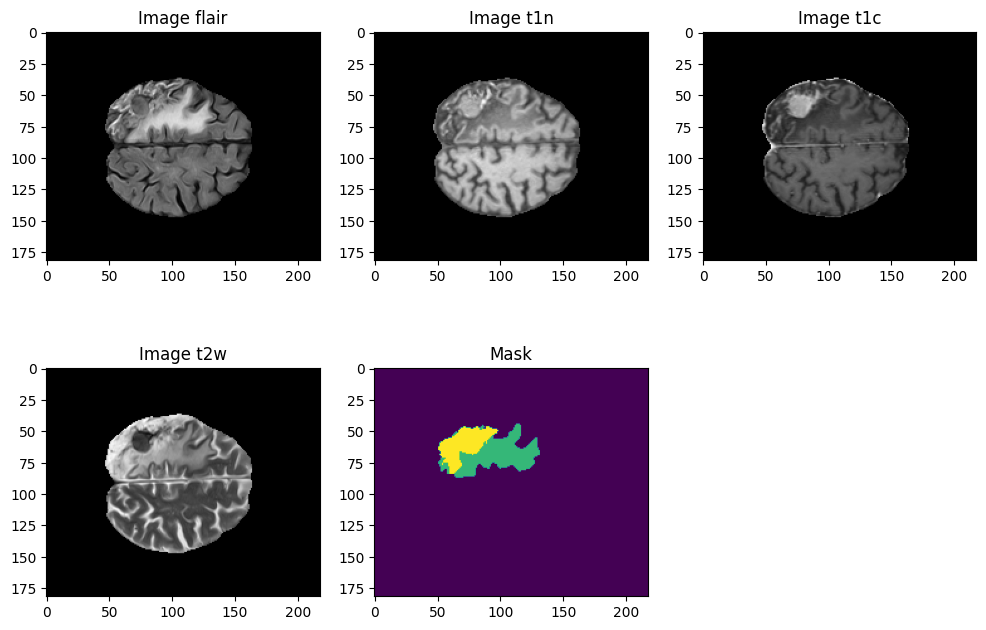

In [8]:
import random
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1n[:,:,n_slice], cmap='gray')
plt.title('Image t1n')
plt.subplot(233)
plt.imshow(test_image_t1c[:,:,n_slice], cmap='gray')
plt.title('Image t1c')
plt.subplot(234)
plt.imshow(test_image_t2w[:,:,n_slice], cmap='gray')
plt.title('Image t2w')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [9]:
combined_x = np.stack([test_image_flair, test_image_t1c, test_image_t2w], axis=3)
print(combined_x.shape)

(182, 218, 182, 3)


In [10]:
# combined_x=combined_x[54:182, 90:218, 54:182]
# print(combined_x.shape)
desired_shape = (128, 128, 128, 3)

start_x = (combined_x.shape[0] - desired_shape[0]) // 2
start_y = (combined_x.shape[1] - desired_shape[1]) // 2
start_z = (combined_x.shape[2] - desired_shape[2]) // 2

combined_x = combined_x[start_x:start_x + desired_shape[0],
                       start_y:start_y + desired_shape[1],
                       start_z:start_z + desired_shape[2], :]

print("Cropped shape:", combined_x.shape)

Cropped shape: (128, 128, 128, 3)


In [13]:
print(test_mask.shape)

(182, 218, 182)


In [15]:
# test_mask = test_mask[54:182, 90:218, 54:182]
desired_shape = (128, 128, 128)
start_x1 = (test_mask.shape[0] - desired_shape[0]) // 2
start_y1 = (test_mask.shape[1] - desired_shape[1]) // 2
start_z1 = (test_mask.shape[2] - desired_shape[2]) // 2

test_mask = test_mask[start_x1:start_x1 + desired_shape[0],
                       start_y1:start_y1 + desired_shape[1],
                       start_z1:start_z1 + desired_shape[2]]
print(test_mask.shape)

(128, 128, 128)


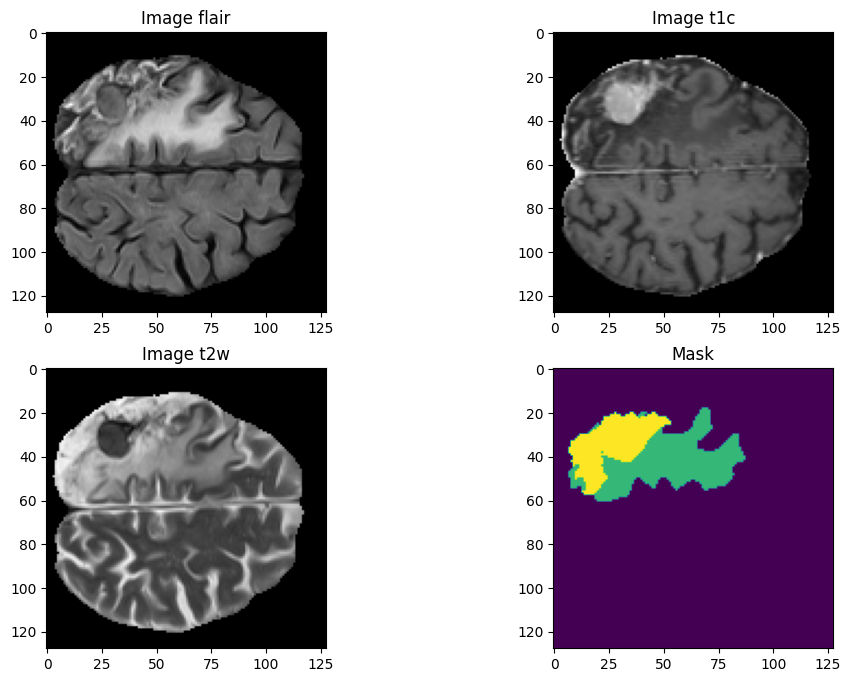

In [20]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1c')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2w')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [23]:
np.save('/NPYcombined/combined-GLI-02076-100.npy', combined_x)

In [26]:
my_img=np.load('/NPYcombined/combined-GLI-02076-100.npy')
print(my_img.shape)

(128, 128, 128, 3)


In [27]:
from tifffile import imsave
imsave('combined-GLI-02076-100.tif', combined_x)

C:\Users\Romir\AppData\Local\Temp\ipykernel_60384\1471431556.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('combined-GLI-02076-100.tif', combined_x)


In [28]:
np.save('/NPYmask/mask-GLI-02076-100.npy', test_mask)

In [3]:
t2_list = sorted(glob.glob('C://Users//Romir//Desktop//Projects//BraTS//datasets//BraTS2024-BraTS-GLI-TrainingData//extracted//*t2w.nii'))

In [3]:
t2_list = sorted(glob.glob('C://Users//Romir//Desktop//Projects//BraTS//datasets//BraTS2024-BraTS-GLI-TrainingData//extracted_2//*t2w.nii'))
t1ce_list = sorted(glob.glob('C://Users//Romir//Desktop//Projects//BraTS//datasets//BraTS2024-BraTS-GLI-TrainingData//extracted_2//*t1c.nii'))
flair_list = sorted(glob.glob('C://Users//Romir//Desktop//Projects//BraTS//datasets//BraTS2024-BraTS-GLI-TrainingData//extracted_2//*t2f.nii'))
mask_list = sorted(glob.glob('C://Users//Romir//Desktop//Projects//BraTS//datasets//BraTS2024-BraTS-GLI-TrainingData//extracted_2//*seg.nii'))


In [4]:
print(len(t2_list))
print(len(t1ce_list))
print(len(flair_list))
print(len(mask_list))

70
70
70
70


In [1]:
import os
os.makedirs('./Validation/combined', exist_ok=True)
os.makedirs('./Validation/mask', exist_ok=True)

In [5]:
#Each volume generates 18 64x64x64x4 sub-volumes. 
#Total 369 volumes = 6642 sub volumes

for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))

    # non_zero_slices = [i for i in range(test_mask.shape[2]) if np.any(test_mask[:, :, i])]
    # if non_zero_slices:
    #     n_slice = random.choice(non_zero_slices)
    # else:
    #     n_slice = random.randint(0, test_mask.shape[2])
    
    combined_x = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
    desired_shape = (128, 128, 128, 3)

    start_x = (combined_x.shape[0] - desired_shape[0]) // 2
    start_y = (combined_x.shape[1] - desired_shape[1]) // 2
    start_z = (combined_x.shape[2] - desired_shape[2]) // 2

    combined_x = combined_x[start_x:start_x + desired_shape[0],
                        start_y:start_y + desired_shape[1],
                        start_z:start_z + desired_shape[2], :]

    desired_shape = (128, 128, 128)
    start_x1 = (temp_mask.shape[0] - desired_shape[0]) // 2
    start_y1 = (temp_mask.shape[1] - desired_shape[1]) // 2
    start_z1 = (temp_mask.shape[2] - desired_shape[2]) // 2

    temp_mask = temp_mask[start_x1:start_x1 + desired_shape[0],
                        start_y1:start_y1 + desired_shape[1],
                        start_z1:start_z1 + desired_shape[2]]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('./Validation/image/image_'+str(img)+'.npy', combined_x)
        np.save('./Validation/mask/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
Save Me
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
I am useless
Now preparing image and masks number:  10
I am useless
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
I am useless
Now preparing image and masks number:  18
I am useless
Now preparing image and masks number:  1